# Day 32

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 엔트로피

엔트로피(entropy)는 확률 변수가 담을 수 있는 정보의 양을 나타내는 값으로 다음과 같이 정의한다.

확률 변수 $X$가 이산 확률 변수이면

$$ H[X] = -\sum_{k=1}^K p(x_k) \log_2 p(x_k) $$


확률 변수 $X$가 연속 확률 변수이면

$$ H[X] = -\int p(x) \log_2 p(x) \; dx $$


이 식에서 $p(x)$는 확률 밀도(질량) 함수이다.

## 엔트로피 계산 예

실제로 엔트로피를 계산해 보자.

만약 이산 확률 변수가 1부터 8까지의 8개의 값 또는 클래스를 가질 수 있고 각각의 클래스에 대한 확률이 다음과 같다고 가정한다.

$$ \Big\{ \dfrac{1}{2}, \dfrac{1}{4}, \dfrac{1}{8}, \dfrac{1}{16}, \dfrac{1}{64}, \dfrac{1}{64}, \dfrac{1}{64}, \dfrac{1}{64} \Big\} $$

이 때의 엔트로피는 다음과 같다.

$$ H = -\dfrac{1}{2}\log_2\dfrac{1}{2} -\dfrac{1}{4}\log_2\dfrac{1}{4} -\dfrac{1}{8}\log_2\dfrac{1}{8} -\dfrac{1}{16}\log_2\dfrac{1}{16} -\dfrac{4}{64}\log_2\dfrac{1}{64} = 2 $$

만약 모든 가능한 값(클래스) $x_k$에 대해 $p(x_k) = 0$ 또는 $p(x_k) = 1$ 뿐이라면 엔트로피는 0 임을 알 수 있다. 이 경우는 사실 단 하나의 값만 나올 수 있는는 경우이므로 정보가 없는 상수값이다.

만약 이산 확률 변수가 가질 수 있는 값(클래스)의 종류가 $2^K$이고 모두 같은 확률을 가진다면

$$ H = -\frac{2^K}{2^K}\log_2\dfrac{1}{2^K} = K $$

이다. 즉,  엔트로피는 이산 확률 변수가 가질 수 있는 확률 변수가 동일한 값의 가짓수와 같다.

## 표본 데이터가 주어진 경우

확률 변수 모형, 즉 이론적인 확률 밀도(질량) 함수가 아닌 실제 데이터가 주어진 경우에는 확률 밀도(질량) 함수를 추정하여 엔트로피를 계산한다.

예를 들어 데이터가 모두 80개가 있고 그 중 Y = 0 인 데이터가 40개, Y = 1인 데이터가 40개 있는 경우는

$$ P(y=0) = \dfrac{40}{80} = \dfrac{1}{2} $$

$$ P(y=1) = \dfrac{40}{80} = \dfrac{1}{2} $$

$$ H[Y] = -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) = \dfrac{1}{2} + \dfrac{1}{2}  = 1 $$



In [3]:
-1/2*np.log2(1/2)-1/2*np.log2(1/2)

1.0

만약 데이터가 모두 60개가 있고 그 중 Y= 0 인 데이터가 20개, Y = 1인 데이터가 40개 있는 경우는

$$ P(y=0) = \dfrac{20}{60} = \dfrac{1}{3} $$

$$ P(y=1) = \dfrac{40}{60} = \dfrac{2}{3} $$

$$ H[Y] = -\dfrac{1}{3}\log_2\left(\dfrac{1}{3}\right) -\dfrac{2}{3}\log_2\left(\dfrac{2}{3}\right) = 0.92 $$

In [4]:
-1/3*np.log2(1/3)-2/3*np.log2(2/3)

0.91829583405448956

만약 데이터가 모두 40개가 있고 그 중 Y= 0 인 데이터가 30개, Y = 1인 데이터가 10개 있는 경우는

$$ P(y=0) = \dfrac{30}{40} = \dfrac{3}{4} $$

$$ P(y=1) = \dfrac{10}{40} = \dfrac{1}{4} $$

$$ H[Y] = -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right) = 0.81 $$

In [5]:
-3/4*np.log2(3/4)-1/4*np.log2(1/4)

0.81127812445913283

만약 데이터가 모두 20개가 있고 그 중 Y= 0 인 데이터가 20개, Y = 1인 데이터가 0개 있는 경우는

$$ P(y=0) = \dfrac{20}{20} = 1 $$

$$ P(y=1) = \dfrac{0}{20} = 0 $$

$$ H[Y] \rightarrow 0 $$

## 조건부 엔트로피

조건부 엔트로피는 다음과 같이 정의한다.

$$ H[Y \mid X] = - \sum_i \sum_j \,p(x_i, y_j) \log_2 p(y_j \mid x_i)  $$

$$ H[Y \mid X] = -\int \int p(x, y) \log_2 p(y \mid x) \; dxdy $$


이 식은 조건부 확률 분포의 정의를 사용하여 다음과 같이 고칠 수 있다.

$$ H[Y \mid X]  = \sum_i \,p(x_i)\,H[Y \mid x_i] $$

$$ H[Y \mid X]  = \int p(x)\,H[Y \mid x] \; dx $$



(증명)

$$ 
\begin{eqnarray}
H[Y \mid X] 
&=& - \sum_i \sum_j \,p(x_i, y_j) \log_2 p(y_j \mid x_i) \\
&=& - \sum_i \sum_j p(y_j \mid x_i) p(x_i) \log_2 p(y_j \mid x_i) \\
&=& - \sum_i p(x_i) \sum_j p(y_j \mid x_i)  \log_2 p(y_j \mid x_i) \\
&=& \sum_i p(x_i) H[Y \mid x_i] \\
\end{eqnarray}
$$


조건부 엔트로피와 결합 엔트로피는 다음과 같은 관계를 가진다.

$$ H[ X, Y ] = H[Y \mid X] + H[X] $$

## 조건부 엔트로피 계산의 예

예를 들어 데이터가 모두 80개가 있고 $X$, $Y$ 값이 다음과 같다고 하자

| | Y = 0 | Y = 1 | sum |
|-|-|-|-|
| X = 0 | 30 | 10 | 40 |
| X = 1 | 10 | 30 | 40 |


$$ 
H[Y \mid X ] = p(X=0)\,H[Y \mid X=0] + p(X=1)\,H[Y \mid X=1] = \dfrac{40}{80} \cdot 0.81 + \dfrac{40}{80} \cdot 0.81 = 0.81
$$

만약 데이터가 모두 80개가 있고 $X$, $Y$ 값이 다음과 같다면

| | Y = 0 | Y = 1 | sum |
|-|-|-|-|
| X = 0 | 20 | 40 | 60 |
| X = 1 | 20 | 0  | 20 |


$$ 
H[Y \mid X ] = p(X=0)\,H[Y \mid X=0] + p(X=1)\,H[Y \mid X=1] = \dfrac{60}{80} \cdot 0.92 + \dfrac{20}{80} \cdot 0 = 0.69
$$

In [24]:
df = pd.DataFrame([[80,20],[40,60]])
df

,0,1
0,80,20
1,40,60


In [40]:
H_Y = -120/200 * np.log2(120/200) - 80/200*np.log2(80/200)
print("H[Y]:     ",H_Y)

H_X = -100/200 * np.log2(100/200) - 100/200*np.log2(100/200)
print("H[X]:     ", H_X)

H_Y_X0 = -80/100 * np.log2(80/100) - 20/100*np.log2(20/100)
print("H[Y|X=0]: ", H_Y_X0)

H_Y_X1 = -40/100 * np.log2(40/100) - 60/100*np.log2(60/100)
print("H[Y|X=1]: ", H_Y_X1)

H_Y_X = +100/200 * H_Y_X0 + 100/200 * H_Y_X1
print("H[Y|X]:   ", H_Y_X)

H[Y]:      0.970950594455
H[X]:      1.0
H[Y|X=0]:  0.721928094887
H[Y|X=1]:  0.970950594455
H[Y|X]:    0.846439344671


# 의사 결정 나무

의사 결정 나무(Decision Tree)는 여러 가지 규칙(rule)을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있다.

의사 결정 나무에서는 규칙(rule)을 기반으로 독립 변수 공간을 영역(region)으로 분할하고 분할된 각각의 영역에 대해 다시 새로운 규칙을 적용하여 독립 변수 공간을 $M$개의 영역 $\mathbf{R}_m$으로 세분화 한다. 따라서 다음과 같은 조건부 확률을 가지는 확률 기반 

$$
p(y \mid x) = \sum_{m=1}^M \mathrm{I}(x \in \mathbf{R}_m)
$$

여기에서 $\mathrm{I}(x \in \mathbf{R}_m)$ 은 $x$ 가 $\mathbf{R}_m$ 에 속하면 1 이고 아니면 0 인 값을 가진다.

## 규칙

영역 분할 규칙은 일반적으로 특정한 독립 변수(feature)의 값이 
  * 기준값(threshold)보다 큰지 혹은 작은지 (실수인 경우)
  * 특정 클래스(class)인지 (카테고리 값인 경우)
를 기준으로 한다.

이렇게 규칙을 적용하는 위치를 노드(node)라고 하며 규칙을 연속적으로 적용하면 노드가 계속 증가하는 나무(tree)와 같은 형태로 표현할 수 있다.


## 의사 결정 나무 시각화

의사 결정 나무의 장점은 분류 과정이 사람이 쉽게 이해할 수 있는 직관적 규칙을 가진다는 점이다. 이 장점을 활용하기 위해서는 의사 결정 규칙을 시각화를 통해 표현해야 한다. 의사 결정 나무를 시각화하려면 GraphViz 프로그램과 pydot 파이썬 패키지를 사용한다. 

## 규칙 적용의 종료

노드에서 규칙이 적용되어 영역이 분할되면 각 영역 $R_m$에 속하는 표본 데이터 집합 $\{x_m, y_m\}$ 이 결정된다. 만약 하나의 영역에 속하는 모든 표본 데이터가 같은 클래스 값을 가진다면 더이상 영역을 분할할 필요가 없으므로 규칙 적용이 종료되고 하위 노드가 생성되지 않는다. 가장 극단적인 경우는 최종 영역이 하나의 표본 데이터만을 가지는 경우이다.

In [43]:

from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(classifier):
    dot_buf = StringIO.StringIO() 
    export_graphviz(classifier, out_file=dot_buf, feature_names=iris.feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, classifier, title):
    resolution=0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel('sepal length [cm]')
    plt.ylabel('sepal width [cm]')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

# 모형 결합

모형 결합(model combining) 방법은 앙상블 방법론(ensemble methods)이라고도 한다. 이는 특정한 하나의 예측 방법이 아니라 복수의 예측 모형을 결합하여 더 나은 성능의 예측을 하려는 시도이다. 

모형 결합 방법을 사용하면 일반적으로 계산량은 증가하지만 다음과 같은 효과가 있다.

* 단일 모형을 사용할 때 보다 성능 분산이 감소하고
* 과최적화를 방지한다.

모형 결합 방법은 크게 나누어 평균(averaging, aggregation) 방법론과 부스팅(boosting) 방법론으로 나눌 수 있다.

* 평균 방법론은 사용할 모형의 집합이 이미 결정되어 있지만
* 부스팅 방법론은 사용할 모형을 점진적으로 늘려간다.

각 방법론의 대표적인 방법들은 아래와 같다.

* 평균 방법론
 * 다수결 (Majority Voting)
 * 배깅 (Bagging)
 * 랜덤 포레스트 (Random Forests)


* 부스팅 방법론
 * 에이다부스트 (AdaBoost)
 * 그레디언트 부스트 (Gradient Boost)

## 다수결 방법

다수결 방법은 가장 단순한 모형 결합 방법으로 전혀 다른 모형도 결합할 수 있다. 다수결 방법은 Hard Voting 과 Soft Voting 두 가지로 나뉘어진다. 

* hard voting: 단순 투표. 개별 모형의 결과 기준
* soft voting: 가중치 투표. 개별 모형의 조건부 확률의 합 기준
 


Scikit-Learn 의 ensemble 서브패키지는 다수결 방법을 위한 [`VotingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) 클래스를 제공한다.


`sklearn.ensemble.VotingClassifier(estimators, voting='hard', weights=None)`

* 입력 인수:	
 * `estimators` : 
    * 개별 모형 목록, 리스트나 named parameter 형식으로 입력
 * `voting` : 문자열 {‘hard’, ‘soft’} (디폴트 ’hard’)
    * hard voting 과 soft voting 선택
 * `weights` : 리스트
    * 사용자 가중치



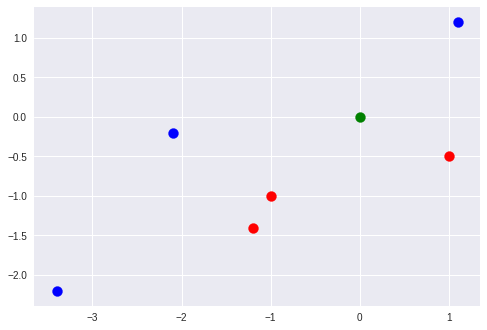

In [62]:
X = np.array([[-1.0, -1.0], [-1.2, -1.4], [1, -0.5], [-3.4, -2.2], [1.1, 1.2], [-2.1, -0.2]])
y = np.array([1, 1, 1, 2, 2, 2])
x_new = [0, 0]
plt.scatter(X[y==1,0], X[y==1,1], s=100, c='r')
plt.scatter(X[y==2,0], X[y==2,1], s=100, c='b')
plt.scatter(x_new[0], x_new[1], s=100, c='g')

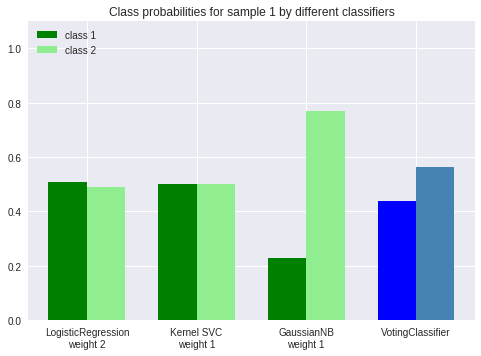

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = SVC(C=5, gamma=0.1, random_state=1, probability=True)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('ksvc', clf2), ('gnb', clf3)], voting='soft', weights=[2, 1, 1])

probas = [c.fit(X, y).predict_proba([x_new]) for c in (clf1, clf2, clf3, eclf)]
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

ind = np.arange(4)
width = 0.35  # bar width
p1 = plt.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, align="center", color='green')
p2 = plt.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, align="center", color='lightgreen')
p3 = plt.bar(ind, [0, 0, 0, class1_1[-1]], width, align="center", color='blue')
p4 = plt.bar(ind + width, [0, 0, 0, class2_1[-1]], width, align="center", color='steelblue')

plt.xticks(ind + 0.5 * width, ['LogisticRegression\nweight 2',
                               'Kernel SVC\nweight 1',
                               'GaussianNB\nweight 1',
                               'VotingClassifier'])
plt.ylim([0, 1.1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.show()

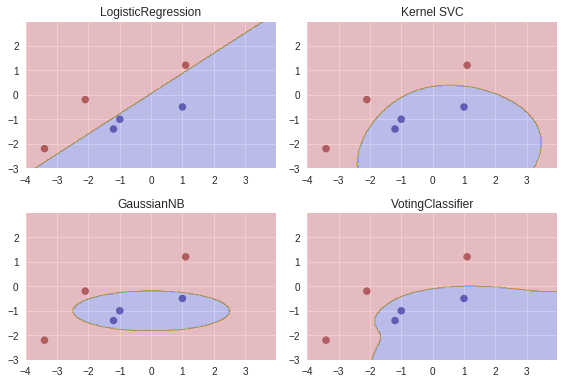

In [73]:
from itertools import product
import matplotlib as mpl
x_min, x_max = -4, 4
y_min, y_max = -3, 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.025), np.arange(y_min, y_max, 0.025))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['LogisticRegression', 'Kernel SVC', 'GaussianNB', 'VotingClassifier']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()    
plt.show()

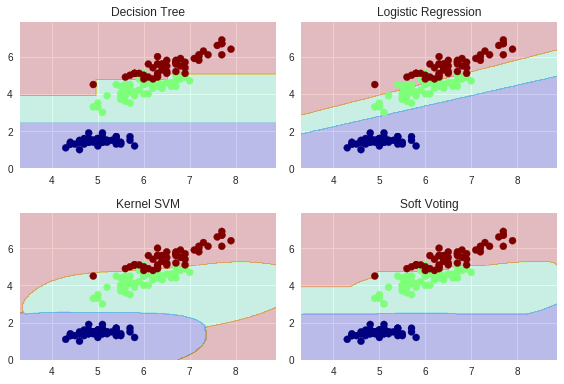

In [74]:
from itertools import product
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=4).fit(X, y)
model2 = LogisticRegression().fit(X, y)
model3 = SVC(probability=True).fit(X, y)
model4 = VotingClassifier(estimators=[('dt', model1), ('lr', model2), ('svc', model3)],
                          voting='soft', weights=[1, 2, 3]).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.025), np.arange(y_min, y_max, 0.025))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, model4],
                        ['Decision Tree', 'Logistic Regression', 'Kernel SVM', 'Soft Voting']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()    
plt.show()

다수결 모형이 개별 모형보다 더 나은 성능을 보이는 이유는 다음 실험에서도 확인 할 수 있다.

만약 어떤 개별 모형이 오차를 출력할 확률이 $p$인 경우에 이러한 모형을 $N$ 개 모아서 다수결 모형을 만들면 오차를 출력할 확률이 다음과 같아진다.


$$ \sum_{k>\frac{N}{2}}^N \binom N k p^k (1-p)^{N-k} $$ 

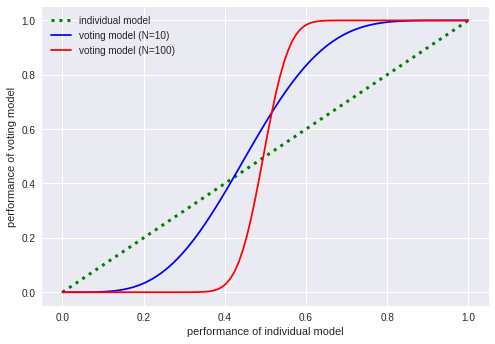

In [50]:
import scipy as sp
def total_error(p, N):
    te = 0.0
    for k in range(int(np.ceil(N/2)), N + 1):
        te += sp.misc.comb(N, k) * p**k * (1-p)**(N-k)
    return te

x = np.linspace(0, 1, 100)
plt.plot(x, x, 'g:', lw=3, label="individual model")
plt.plot(x, total_error(x, 10), 'b-', label="voting model (N=10)")
plt.plot(x, total_error(x, 100), 'r-', label="voting model (N=100)")
plt.xlabel("performance of individual model")
plt.ylabel("performance of voting model")
plt.legend(loc=0)
plt.show()

## 배깅

배깅(bagging)은 동일한 모형과 모형 모수를 사용하는 대신 부트스트래핑(bootstrapping)과 유사하게 트레이닝 데이터를 랜덤하게 선택해서 다수결 모형을 적용한다.

트레이닝 데이터를 선택하는 방법에 따라 다음과 같이 부르기도 한다.

* 같은 데이터 샘플을 중복사용(replacement)하지 않으면: Pasting
* 같은 데이터 샘플을 중복사용(replacement)하면 Bagging
* 데이터가 아니라 다차원 독립 변수 중 일부 차원을 선택하는 경우에는: Random Subspaces
* 데이터 샘플과 독립 변수 차원 모두 일부만 랜덤하게 사용하면: Random Patches

성능 평가시에는 트레이닝용으로 선택한 데이터가 아닌 다른 데이터를 사용할 수도 있다. 이런 데이터를 OOB(out-of-bag) 데이터라고 한다.

Scikit-Learn 의  ensemble 서브패키지는 배깅 모형 결합을 위한 [`BaggingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) 클래스를 제공한다. 사용법은 다음과 같다.



`sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)`


* 인수:	
 * `base_estimator`: 
   * 기본 모형
 * `n_estimators`: 정수. 디폴트 10
   * 모형 갯수
 * `max_samples`: 정수 혹은 실수. 디폴트 1.0
   * 데이터 샘플 중 선택할 샘플의 수 혹은 비율
 * `max_features`: 정수 혹은 실수. 디폴트 1.0
   * 다차원 독립 변수 중 선택할 차원의 수 혹은 비율
 * `bootstrap`: 불리언, 디폴트 True
   * 데이터 중복 사용 여부
 * `bootstrap_features`: 불리언, 디폴트 False
   * 차원 중복 사용 여부
 * `oob_score`: 불리언 디폴트 False
   * 성능 평가시 OOB(out-of-bag) 샘플 사용 여부

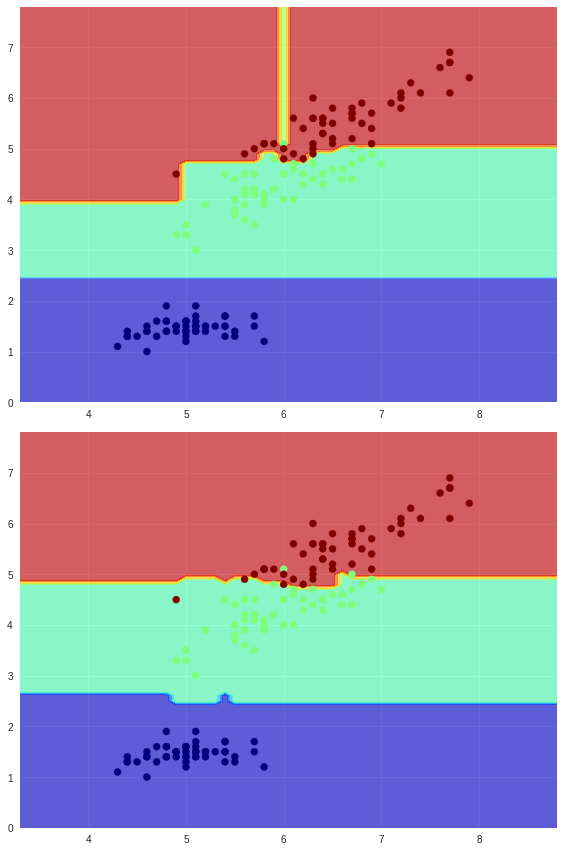

In [51]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier().fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(), bootstrap_features=True, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.figure(figsize=(8,12))

plt.subplot(211)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet)

plt.subplot(212)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet)

plt.tight_layout()
plt.show()

## 랜덤 포레스트

랜덤 포레스트(Random Forest)는 의사 결정 나무(Decision Tree)를 개별 모형으로 사용하는 모형 결합 방법을 말한다.

배깅과 마찬가지로 데이터 샘플의 일부만 선택하여 사용한다. 하지만 노드 분리시 모든 독립 변수들을 비교하여 최선의 독립 변수를 선택하는 것이 아니라 독립 변수 차원을 랜덤하게 감소시킨 다음 그 중에서 독립 변수를 선택한다. 이렇게 하면 개별 모형들 사이의 상관관계가 줄어들기 때문에 모형 성능의 변동이 감소하는 효과가 있다.

이러한 방법을 극단적으로 적용한 것이 Extremely Randomized Trees 모형으로 이 경우에는 각 노드에서 랜덤하게 독립 변수를 선택한다.

랜덤 포레스트와 Extremely Randomized Trees 모형은 각각 `RandomForestClassifier`클래스와 `ExtraTreesClassifier` 클래스로 구현되어 있다.

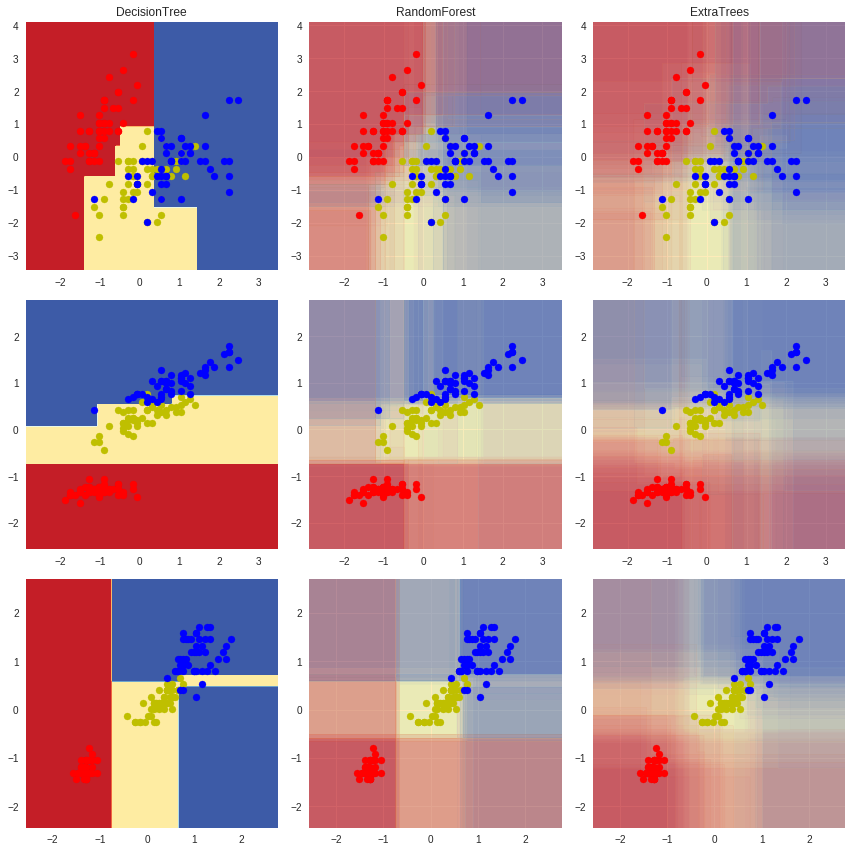

In [52]:
from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

n_classes = 3
n_estimators = 30
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02  
RANDOM_SEED = 13

models = [DecisionTreeClassifier(max_depth=4),
          RandomForestClassifier(max_depth=4, n_estimators=n_estimators),
          ExtraTreesClassifier(max_depth=4, n_estimators=n_estimators)]

plot_idx = 1
plt.figure(figsize=(12, 12))
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        X = iris.data[:, pair]
        y = iris.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        clf = clone(model)
        clf = model.fit(X, y)
        
        plt.subplot(3, 3, plot_idx)
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        if plot_idx <= len(models):
            plt.title(model_title)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        for i, c in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i], cmap=cmap)

        plot_idx += 1

plt.tight_layout()
plt.show()

랜덤 포레스트의 장점 중 하나는 각 독립 변수의 중요도(feature importance)를 계산할 수 있다는 점이다.

포레스트 안에서 사용된 모든 노드에 대해 어떤 독립 변수를 사용하였고 그 노드에서 얻은 information gain을 구할 수 있으므로 각각의 독립 변수들이 얻어낸 information gain의 평균을 비교하면 어떤 독립 변수가 중요한지를 비교할 수 있다.

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


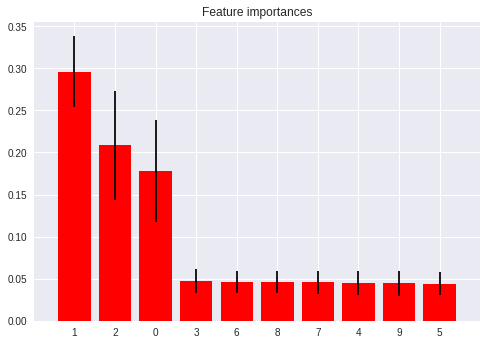

In [53]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /home/jihoon_kim/scikit_learn_data


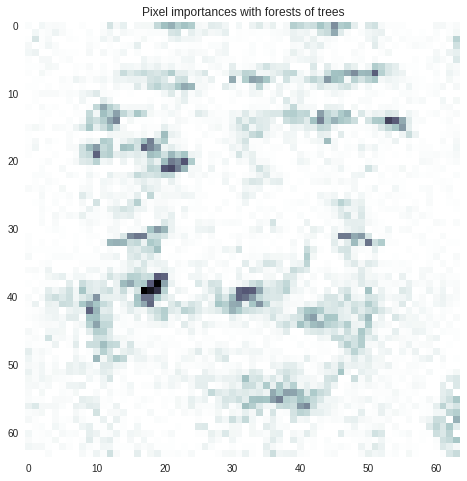

In [54]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

data = fetch_olivetti_faces()
X = data.images.reshape((len(data.images), -1))
y = data.target

mask = y < 5  # Limit to 5 classes
X = X[mask]
y = y[mask]

forest = ExtraTreesClassifier(n_estimators=1000, max_features=128, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

plt.figure(figsize=(8, 8))
plt.imshow(importances, cmap=plt.cm.bone_r)
plt.grid(False)
plt.title("Pixel importances with forests of trees")
plt.show()

### 예: 이미지 완성

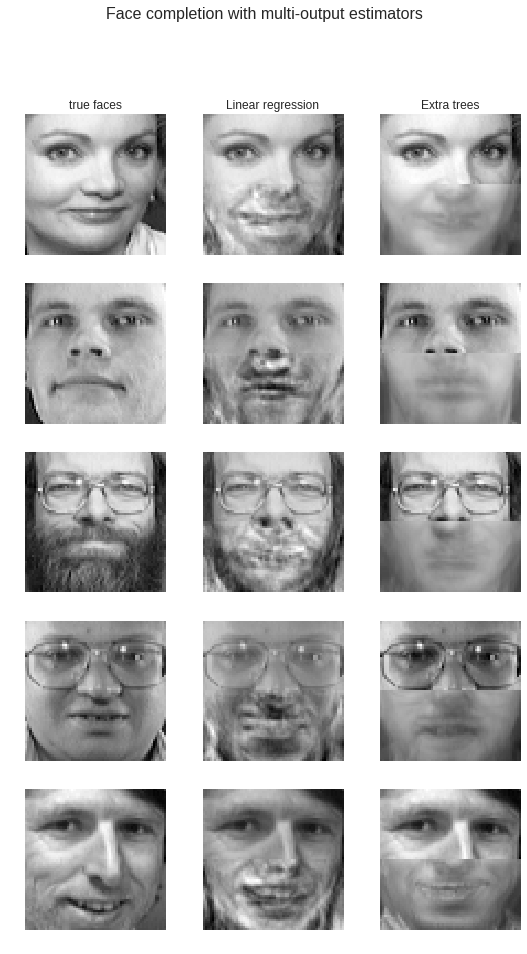

In [55]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]

n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
X_train = train[:, :int(np.ceil(0.5 * n_pixels))]  # Upper half of the faces
y_train = train[:, int(np.floor(0.5 * n_pixels)):]  # Lower half of the faces
X_test = test[:, :int(np.ceil(0.5 * n_pixels))]
y_test = test[:, int(np.floor(0.5 * n_pixels)):]

ESTIMATORS = {
    "Linear regression": LinearRegression(),
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

image_shape = (64, 64)
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(3*n_cols, 3*n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")

    for j, est in enumerate(ESTIMATORS):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest");

## 에이다 부스트

에이다 부스트와 같은 부스트(boost) 방법은 미리 정해진 모형 집합을 사용하는 것이 아니라 단계적으로 모형 집합에 포함할 개별 모형을 선택한다. 부스트 방법에서 성능이 떨어지는 개별 모형을 weak classifier라고 한다.

또한 다수결 방법을 사용하지 않고 각 weak classifier $k$개에 대한 가중치를 주고 선형 결합하여 최종 모형인 boosted classifier $C$를 생성한다.



$$ C_{(m-1)}(x_i) = \alpha_1k_1(x_i) + \cdots + \alpha_{m-1}k_{m-1}(x_i) $$


$$ C_{m}(x_i) = C_{(m-1)}(x_i) + \alpha_m k_m(x_i) $$


* $k_m$ 선택 방법
 * 가중치 오차가 가장 적은 $k_m$
$$ E = \sum_{y_i \neq k_m(x_i)} w_i^{(m)} = \sum_{y_i \neq k_m(x_i)} e^{-y_i C_{m-1}(x_i)}$$ 

* $\alpha_m$ 결정 방법

$$ \epsilon_m = \dfrac{\sum_{y_i \neq k_m(x_i)} w_i^{(m)} }{ \sum_{i=1}^N w_i^{(m)}} $$

$$ \alpha_m = \frac{1}{2}\ln\left( \frac{1 - \epsilon_m}{\epsilon_m}\right) $$ 


* 정규화(regularization)를 위해 learning rate $\nu < 1$를 추가

$$ C_{m}(x_i) = C_{(m-1)}(x_i) + \nu\alpha_m k_m(x_i) $$

에이다 부스트 클래스는 `AdaBoostClassifier` 이다. 

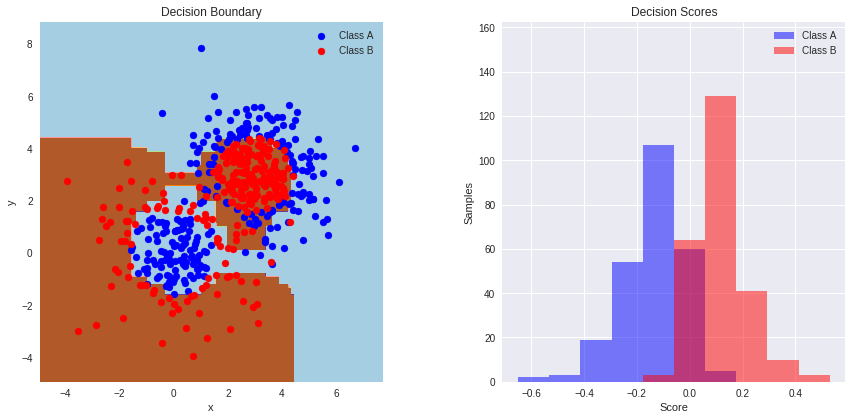

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(12,6))

plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

그레이던트 부스트 모형은 최적화에 사용되는 gradient descent 방법을 응용한 모형이다. 

함수 $f(x)$를 최소화하는 $x$는 다음과 같이 gradient descent 방법으로 찾을 수 있다.

$$ x_{m} = x_{m-1} - \alpha_m \dfrac{df}{dx} $$

그레디언트 부스트 모형에서는 오차 함수 또는 손실 함수(loss function) $L(y, C_{m-1})$ 을 최소화하는 weak classifier $k_m$ 은 $-\tfrac{dL(y, C_{m-1})}{dC_{m-1}}$ 임을 알 수 있다. 

$$ C_{m} = C_{m-1} - \alpha_m \dfrac{dL(y, C_{m-1})}{dC_{m-1}} = C_{m-1} + \alpha_m k_m $$

따라서 그레디언트 부스트 모형에서는 다음과 같은 과정을 반복한다.

1. $-\tfrac{dL(y, C_m)}{dC_m}$ 를 target으로 하는 weak classifier $k_m$ 을 찾는다. 
2. $ \left( C_m - (C_{m-1} + \alpha_m k_m) \right)^2 $ 를 최소화하는 step size $\alpha_m$ 을 찾는다. 
3. $C_m = C_{m-1} + \alpha_m k_m$ 최종 모형을 갱신한다.

weak classifier 의 구조로는 트리를 주로 사용한다.

만약 손실함수가 오차 제곱 형태라면 gradient 는 실제 target $y$ 와   $C_{m-1}$과의 차이 즉, 잔차(residual)가 된다.

$$ L(y, C_{m-1}) = \dfrac{1}{2}(y - C_{m-1})^2 $$

$$ -\dfrac{dL(y, C_m)}{dC_m} = y - C_{m-1} $$

In [57]:
from sklearn.datasets import make_hastie_10_2
X, y = make_hastie_10_2(random_state=0)

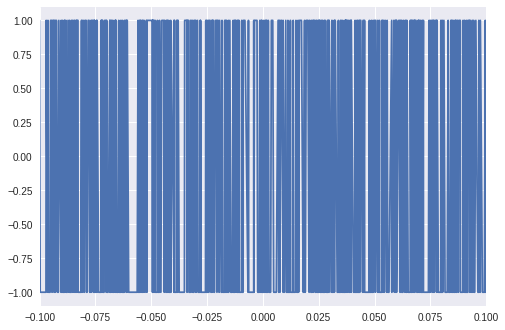

In [58]:
x0 = np.ravel(X[:,0])
idx = np.argsort(x0)
plt.plot(x0[idx], y[idx])
plt.xlim(-0.1, 0.1)
plt.show()

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)

In [60]:
from sklearn.metrics import classification_report
y_pred = model.predict(X)
print(classification_report(y_pred, y))

             precision    recall  f1-score   support

       -1.0       0.95      0.94      0.94      6178
        1.0       0.93      0.95      0.94      5822

avg / total       0.94      0.94      0.94     12000

